In [1365]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder 
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from math  import sqrt
import scipy.stats as stats


In [1366]:
data = pd.read_csv("/Users/nishantsingh/Desktop/stats/ObesityDataSet.csv",nrows=2000)
data["Height"] = data["Height"]*100

In [1367]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,24.349855,170.279397,84.741886,2.386800,2.668180,1.993369,1.031331,0.662802
std,6.486248,9.467057,25.468283,0.530213,0.795717,0.613191,0.853156,0.621938
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.820734,163.000000,65.000000,2.000000,2.577995,1.549162,0.167115,0.000000
50%,22.711510,170.199400,82.000000,2.277257,3.000000,2.000000,1.000000,0.628672
75%,26.000000,177.062475,104.974221,3.000000,3.000000,2.429272,1.705723,1.000000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [1368]:
gender_nobeyesdad = data.groupby(['Gender', 'NObeyesdad']).size()
print(gender_nobeyesdad)

Gender  NObeyesdad         
Female  Insufficient_Weight    173
        Normal_Weight          141
        Obesity_Type_I         156
        Obesity_Type_II          2
        Obesity_Type_III       212
        Overweight_Level_I     145
        Overweight_Level_II    103
Male    Insufficient_Weight     99
        Normal_Weight          146
        Obesity_Type_I         195
        Obesity_Type_II        295
        Obesity_Type_III         1
        Overweight_Level_I     145
        Overweight_Level_II    187
dtype: int64


In [1369]:
columns = ["NObeyesdad","Gender","Age","Height","Weight"]
df = data[columns]

In [1370]:
label_encoder = LabelEncoder()

df["NObeyesdad"] = label_encoder.fit_transform(df["NObeyesdad"])
df["Gender"] = label_encoder.fit_transform(df["Gender"])

/var/folders/kn/x036pv7d2sgg8wy4n1b8614m0000gn/T/ipykernel_23738/2386027748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NObeyesdad"] = label_encoder.fit_transform(df["NObeyesdad"])
/var/folders/kn/x036pv7d2sgg8wy4n1b8614m0000gn/T/ipykernel_23738/2386027748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = label_encoder.fit_transform(df["Gender"])


In [1371]:
df.head()

,NObeyesdad,Gender,Age,Height,Weight
0,1,0,21.0,162.0,64.0
1,1,0,21.0,152.0,56.0
2,1,1,23.0,180.0,77.0
3,5,1,27.0,180.0,87.0
4,6,1,22.0,178.0,89.8


In [1372]:
df.describe()

,NObeyesdad,Gender,Age,Height,Weight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.961000,0.534000,24.349855,170.279397,84.741886
std,1.991347,0.498967,6.486248,9.467057,25.468283
min,0.000000,0.000000,14.000000,145.000000,39.000000
25%,1.000000,0.000000,19.820734,163.000000,65.000000
50%,3.000000,1.000000,22.711510,170.199400,82.000000
75%,5.000000,1.000000,26.000000,177.062475,104.974221
max,6.000000,1.000000,61.000000,198.000000,173.000000


In [1373]:
correlation_matrix = df.corr()


In [1374]:
correlation_matrix

,NObeyesdad,Gender,Age,Height,Weight
NObeyesdad,1.000000,0.055206,0.242083,0.045915,0.374686
Gender,0.055206,1.000000,0.043938,0.632201,0.253414
Age,0.242083,0.043938,1.000000,-0.014843,0.234092
Height,0.045915,0.632201,-0.014843,1.000000,0.493478
Weight,0.374686,0.253414,0.234092,0.493478,1.000000


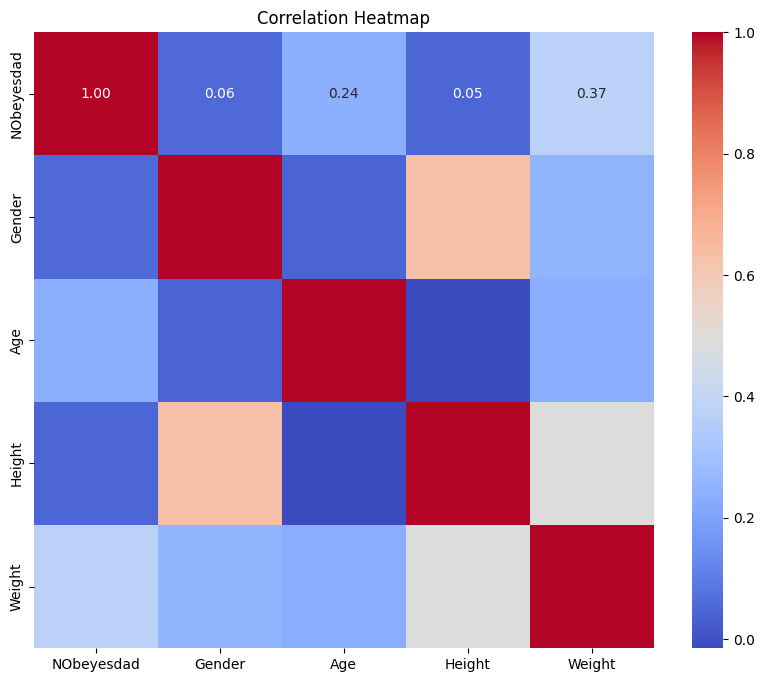

In [1375]:
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

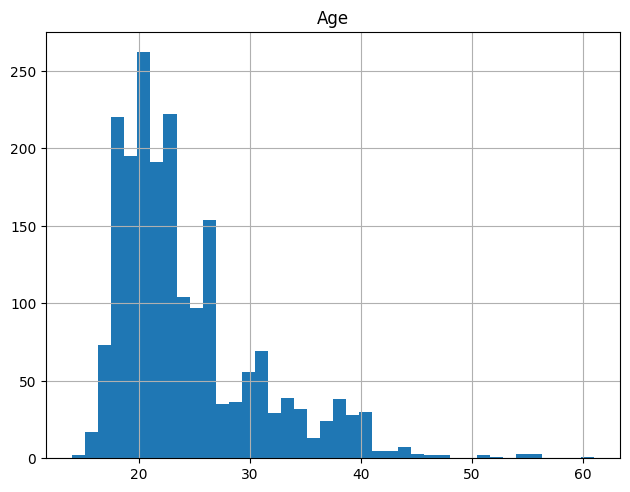

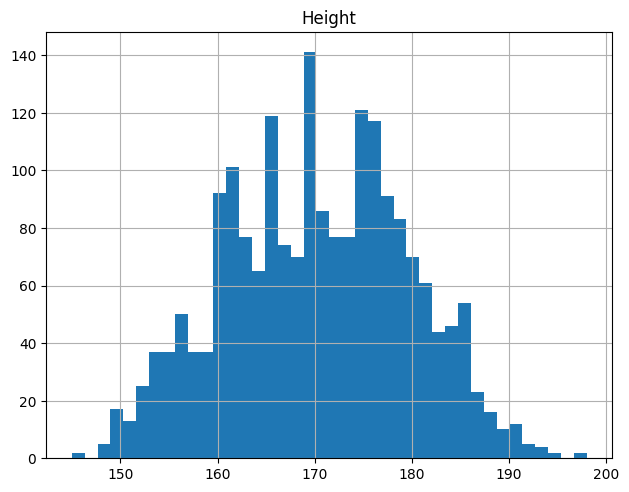

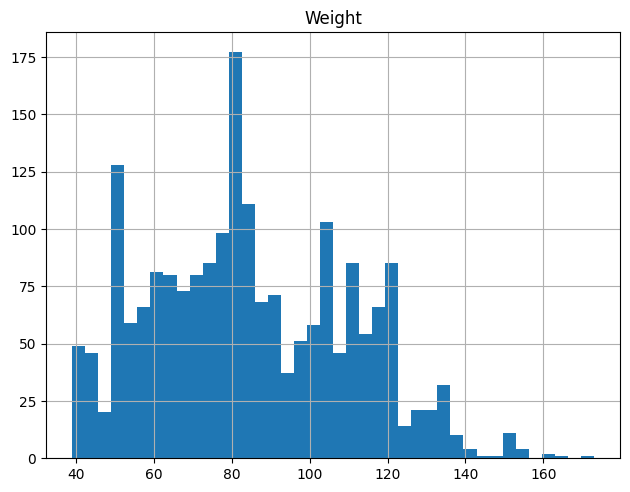

In [1376]:

for col in df :
    if (col != "NObeyesdad") & (col != "family_history_with_overweight") & ((col != "Gender")) & ((col != "FAVC")):
        df[col].hist(bins=40)  
        plt.tight_layout() 
        plt.title(col)
        plt.show()

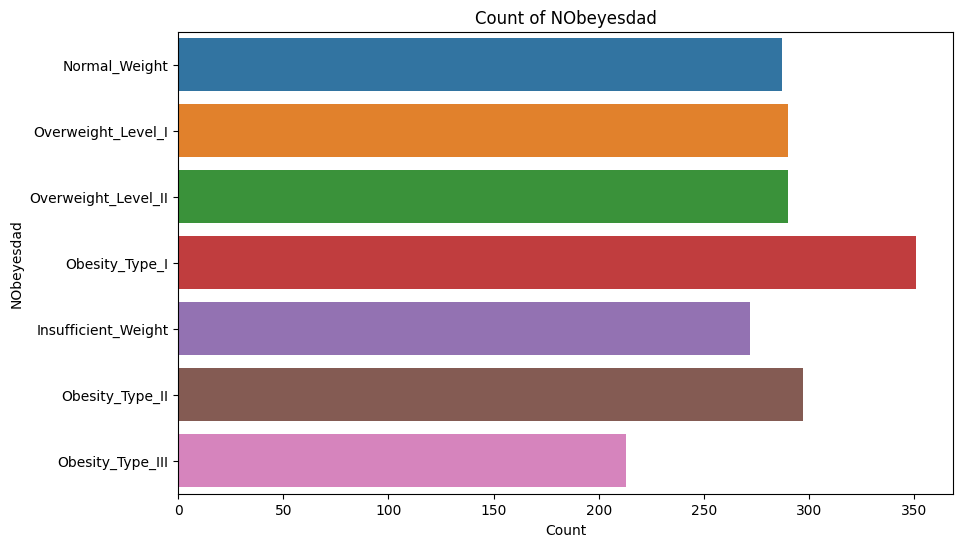

In [1377]:
plt.figure(figsize=(10, 6))
sns.countplot(y='NObeyesdad', data=data)
plt.xlabel('Count')
plt.ylabel('NObeyesdad')
plt.title('Count of NObeyesdad')
plt.show()

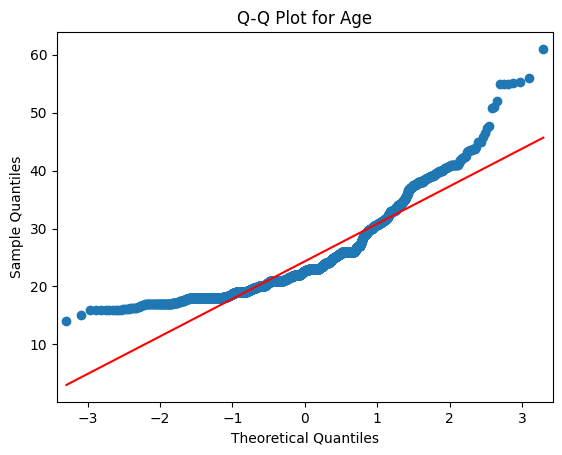

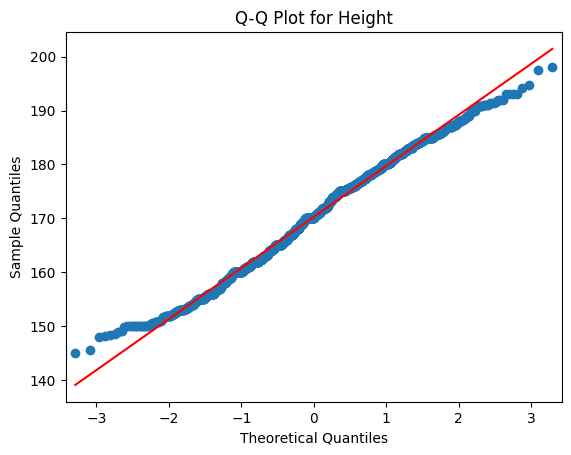

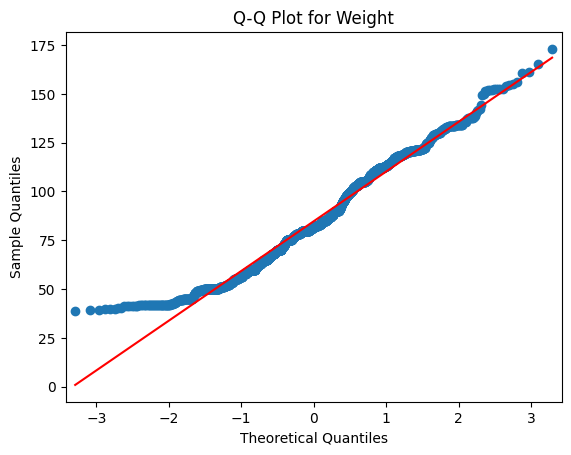

In [1378]:
for col in columns: 
    if (col != "NObeyesdad") & (col != "family_history_with_overweight") & ((col != "Gender")) & ((col != "FAVC")): 
        sm.qqplot(df[col], line='s')  
        plt.title(f'Q-Q Plot for {col}')
        plt.show()

In [1379]:
for col in columns:
    if (col != "NObeyesdad") & (col != "family_history_with_overweight") & ((col != "Gender")) & ((col != "FAVC")):
        statistic, p_value = shapiro(data[col])
        print(f'{col} Shapiro-wilk Test :  Statistic = {statistic} , p-value = {p_value}')
        alpha = 0.05
        if p_value > alpha:
            print("Fail to reject H0")
        else:
            print("Reject H0")

Age Shapiro-wilk Test :  Statistic = 0.8649037480354309 , p-value = 1.8860056413169212e-38
Reject H0
Height Shapiro-wilk Test :  Statistic = 0.9925702810287476 , p-value = 1.5525527530257932e-08
Reject H0
Weight Shapiro-wilk Test :  Statistic = 0.9756847023963928 , p-value = 6.083075057776696e-18
Reject H0


In [1380]:
DF = data["Height"]
random = pd.DataFrame({'Height': DF})
sequential = random.sort_values(by='Height',ascending=True)

## Sequential n=100

In [1381]:
grouped_data = [group['Height'].tolist() for _, group in sequential.groupby(np.arange(len(df)) // 100)]
print(len(grouped_data[0]))

100


In [1382]:
sample_means = [np.mean(group) for group in grouped_data]
mean = np.array(sample_means)
print(mean)

[151.834346 155.877927 159.090876 160.773845 162.29665  163.941848
 165.301445 166.886567 168.634913 169.992601 170.981069 172.536308
 174.420228 175.365024 176.423495 177.920169 179.497199 181.497128
 183.97552  188.340783]


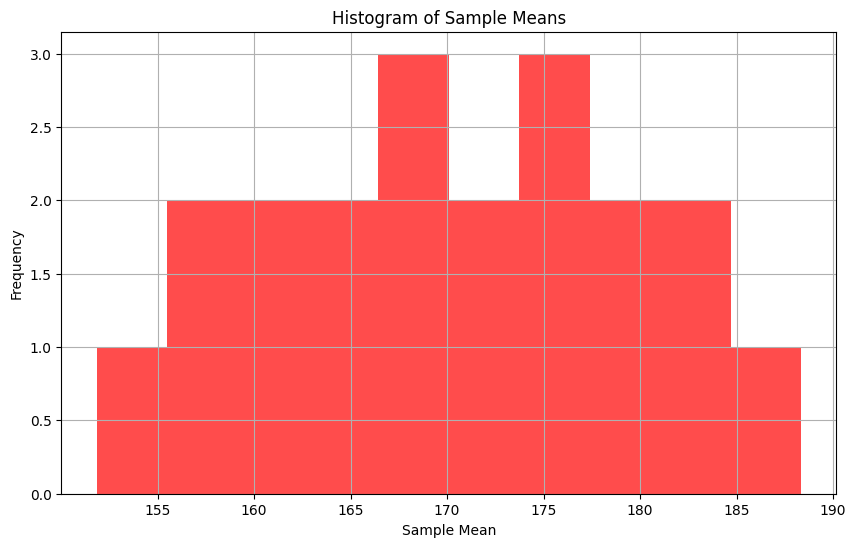

In [1383]:
plt.figure(figsize=(10, 6))
plt.hist(mean, color='red', alpha=0.7)
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

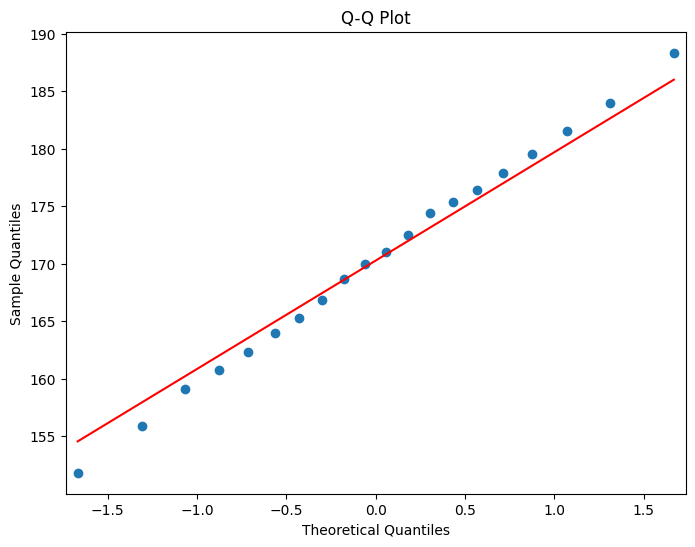

In [1384]:
fig, ax = plt.subplots(figsize=(8, 6))
qqplot(mean, line='s', ax=ax)
ax.set_title('Q-Q Plot')
plt.show()

In [1385]:
population_mean = sequential["Height"].mean()
mean_of_sample_means = np.mean(mean)
population_sd = sequential["Height"].std()
sd_of_sample_mean = np.std(mean)
sqrtsample = population_sd / sqrt(40)

print(f'Population mean (𝜇x):{population_mean}')
print(f'Mean of sample means (𝜇 x-bar):{mean_of_sample_means}')
print(f'Population standard deviation (𝜎x):{population_sd}')
print(f'Standard deviation of sample mean (𝜎 x-bar):{sd_of_sample_mean}')
print(f'Population standard deviation divided by sqrt(n) (𝜎x/sqrt(n)):{sqrtsample}')

Population mean (𝜇x):170.27939705
Mean of sample means (𝜇 x-bar):170.27939705
Population standard deviation (𝜎x):9.46705673863279
Standard deviation of sample mean (𝜎 x-bar):9.421936230962842
Population standard deviation divided by sqrt(n) (𝜎x/sqrt(n)):1.4968731016062493


## Sequential n=20

In [1386]:
grouped_data = [group['Height'].tolist() for _, group in sequential.groupby(np.arange(len(df)) // 20)]
print(len(grouped_data[0]))

20


In [1387]:
sample_means = [np.mean(group) for group in grouped_data]
mean = np.array(sample_means)
print(mean)

[149.086035 150.85368  152.2517   153.082795 153.89752  154.86361
 155.265005 155.93921  156.328765 156.993045 157.887065 158.51661
 159.141925 159.90878  160.       160.018845 160.402885 160.848105
 161.07157  161.52782  161.94822  162.       162.14071  162.48602
 162.9083   163.07739  163.58148  164.02705  164.297975 164.725345
 165.       165.       165.061355 165.52091  165.92496  166.138125
 166.64088  166.960325 167.149035 167.54447  167.94592  168.126585
 168.638815 169.032575 169.43067  169.868655 170.       170.
 170.       170.09435  170.384175 170.70185  170.97601  171.237085
 171.606225 171.904425 172.026135 172.36899  172.99154  173.39045
 173.868905 174.051445 174.411015 174.769775 175.       175.00091
 175.149475 175.379445 175.554185 175.741105 175.930155 176.085825
 176.40787  176.719215 176.97441  177.2618   177.645215 177.996455
 178.184725 178.51265  178.806385 179.112685 179.505505 179.997115
 180.064305 180.50078  181.05266  181.59407  181.968175 182.369955
 182.9

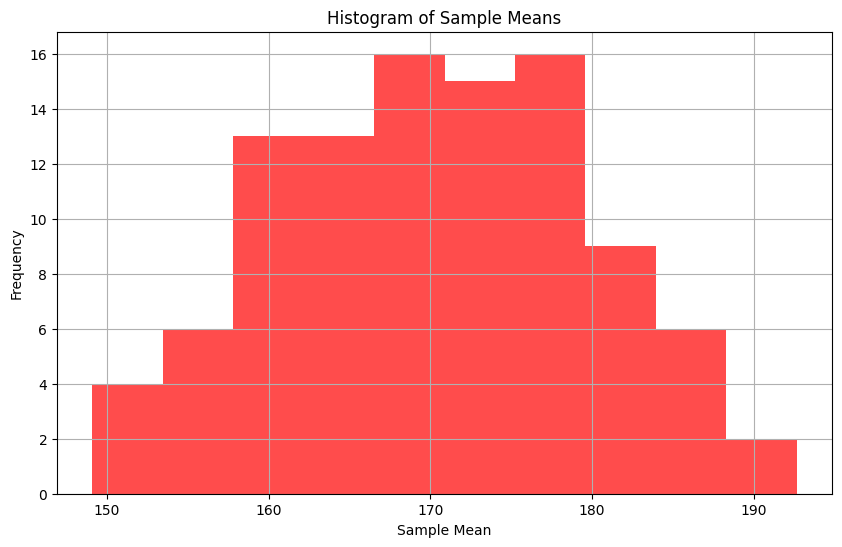

In [1388]:
plt.figure(figsize=(10, 6))
plt.hist(mean, color='red', alpha=0.7)
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

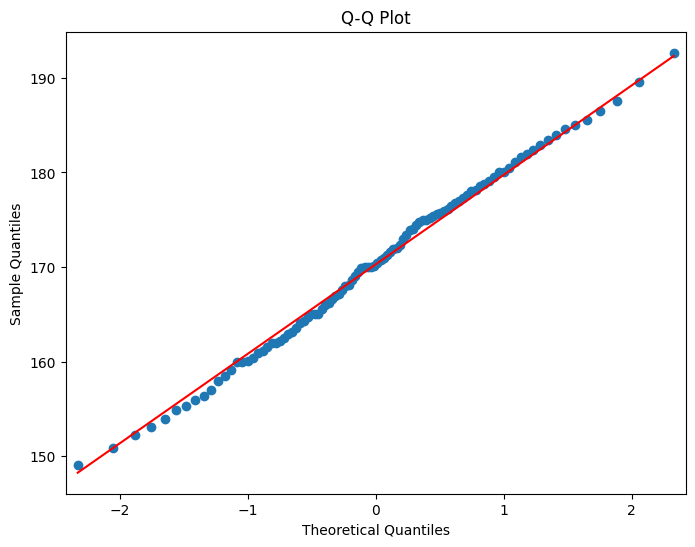

In [1389]:
fig, ax = plt.subplots(figsize=(8, 6))
qqplot(mean, line='s', ax=ax)
ax.set_title('Q-Q Plot')
plt.show()

In [1390]:
population_mean = sequential["Height"].mean()
mean_of_sample_means = np.mean(mean)
population_sd = sequential["Height"].std()
sd_of_sample_mean = np.std(mean)
sqrtsample = population_sd / sqrt(40)

print(f'Population mean (𝜇x):{population_mean}')
print(f'Mean of sample means (𝜇 x-bar):{mean_of_sample_means}')
print(f'Population standard deviation (𝜎x):{population_sd}')
print(f'Standard deviation of sample mean (𝜎 x-bar):{sd_of_sample_mean}')
print(f'Population standard deviation divided by sqrt(n) (𝜎x/sqrt(n)):{sqrtsample}')

Population mean (𝜇x):170.27939705
Mean of sample means (𝜇 x-bar):170.27939705000006
Population standard deviation (𝜎x):9.46705673863279
Standard deviation of sample mean (𝜎 x-bar):9.459878127400167
Population standard deviation divided by sqrt(n) (𝜎x/sqrt(n)):1.4968731016062493


## Random sample n=20

[170.45     166.95     166.       167.95     167.05     164.6
 170.1      166.35     171.75     168.7      166.       168.05
 168.25     169.5      171.95     168.6      169.15     170.8
 169.45     165.4      173.1      172.15     167.3      166.85
 169.49715  167.78519  164.93319  170.930495 170.931785 173.01211
 163.45267  173.74019  162.994815 167.14027  172.32386  173.220435
 169.501315 168.960375 170.056515 167.91318  172.236545 165.215825
 173.95125  163.244735 171.434245 168.504725 169.316735 166.93389
 168.15029  169.538525 171.072375 168.219665 172.668745 170.37698
 168.70495  172.042025 169.938935 172.69312  165.403975 172.595785
 169.139575 167.29189  170.673725 171.743115 166.155675 169.252715
 167.642035 173.766155 174.04169  163.13414  165.42226  167.448635
 170.595155 177.408555 167.58083  171.32071  176.818205 176.875025
 179.48875  176.771005 177.42605  176.68571  178.83645  175.89006
 177.39292  174.47262  179.116085 179.669735 178.088715 172.466445
 168.08997  170.2

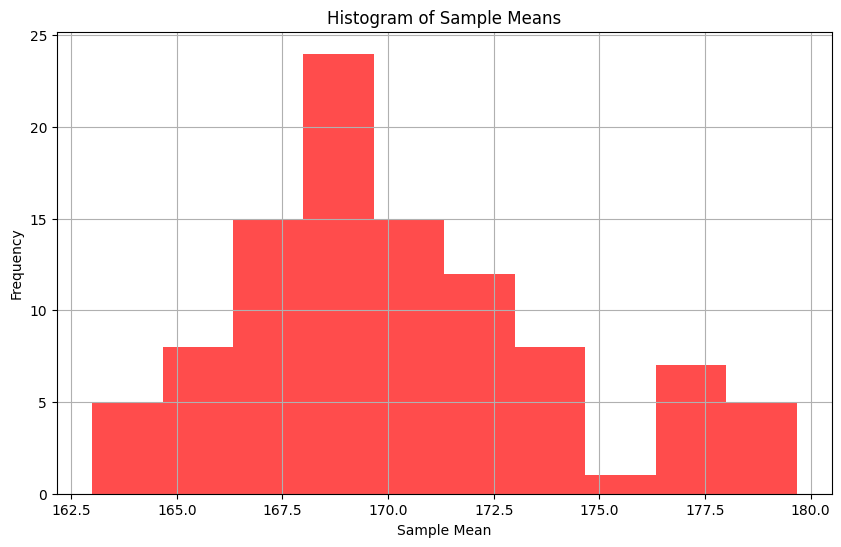

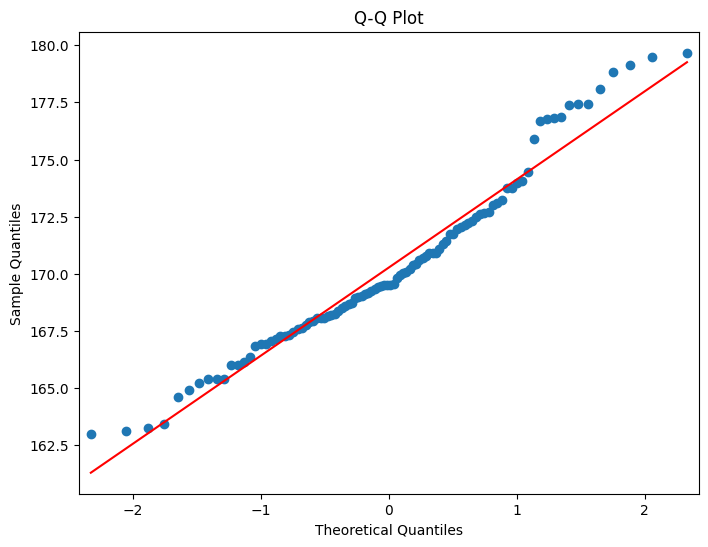

Population mean (𝜇x):170.27939705
Mean of sample means (𝜇 x-bar):170.27939705
Population standard deviation (𝜎x):9.46705673863279
Standard deviation of sample mean (𝜎 x-bar):3.85187923392207
Population standard deviation divided by sqrt(n) (𝜎x/sqrt(n)):1.4968731016062493


In [1391]:
grouped_data = [group['Height'].tolist() for _, group in random.groupby(np.arange(len(df)) // 20)]

sample_means = [np.mean(group) for group in grouped_data]
sample_standard = [np.std(group) for group in grouped_data]
mean = np.array(sample_means)
print(mean)

plt.figure(figsize=(10, 6))
plt.hist(mean, color='red', alpha=0.7)
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))
qqplot(mean, line='s', ax=ax)
ax.set_title('Q-Q Plot')
plt.show()

population_mean = sequential["Height"].mean()
mean_of_sample_means = np.mean(mean)
population_sd = sequential["Height"].std()
sd_of_sample_mean = np.std(mean)
sqrtsample = population_sd / sqrt(40)

print(f'Population mean (𝜇x):{population_mean}')
print(f'Mean of sample means (𝜇 x-bar):{mean_of_sample_means}')
print(f'Population standard deviation (𝜎x):{population_sd}')
print(f'Standard deviation of sample mean (𝜎 x-bar):{sd_of_sample_mean}')
print(f'Population standard deviation divided by sqrt(n) (𝜎x/sqrt(n)):{sqrtsample}')

In [1392]:
sample_mean = mean_of_sample_means
sample_size = 20

population_std = population_sd

confidence_level = 0.95

z_score = norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * (population_std / (sample_size ** 0.5))

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f'Confidence Interval for n=20: ({lower_bound},{upper_bound})')

Confidence Interval for n=20: (166.13035273783547,174.42844136216453)


## Hypothesis testing n=20

H0: Mean is 100
Ha: Mean is not 100

In [1393]:
data = grouped_data[5]

# Hypothesized population mean
mu = 170

sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  
n = len(data)

z_score = (sample_mean - mu) / (sample_std / np.sqrt(n))

p_value = 2 * stats.norm.cdf(-np.abs(z_score))  # for a two-tailed test

# Set the significance level
alpha = 0.05


print (f'Z Statistic: {z_score}')
print(f'p value: {p_value}')
# Make decision
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Z Statistic: -2.6442245122294796
p value: 0.008187832710710472
Reject the null hypothesis


## chisquare test for both one tail and two tail

In [1394]:
from scipy.stats import chi2

n = len(data)
sample_variance = np.var(data, ddof=1)

# Null hypothesis standard deviation
sigma_null = 15

chi2_stat = (n - 1) * sample_variance / sigma_null**2

# Degrees of freedom
deef = n - 1

# Two-tailed test, significance level (alpha) = 0.05
alpha = 0.05

p_value_two_tailed = 2 * chi2.cdf(chi2_stat, deef)

print (f'Chisqr Statistic: {chi2_stat}')
print(f'p value: {p_value}')

if p_value_two_tailed < alpha:
    print("Reject the null hypothesis (two-tailed)")
else:
    print("Fail to reject the null hypothesis (two-tailed)")


Chisqr Statistic: 7.043555555555556
p value: 0.008187832710710472
Reject the null hypothesis (two-tailed)


In [1395]:
n = len(data)
sample_variance = np.var(data, ddof=1)

# Null hypothesis standard deviation
sigma_null = 15

chi2_stat = (n - 1) * sample_variance / sigma_null**2

deef = n - 1

# One-tailed test, significance level (alpha) = 0.05
alpha = 0.05

p_value_one_tailed = chi2.cdf(chi2_stat, deef)

print (f'Chisqr Statistic: {chi2_stat}')
print(f'p value: {p_value}')

if p_value_one_tailed < alpha:
    print("Reject the null hypothesis (one-tailed)")
else:
    print("Fail to reject the null hypothesis (one-tailed)")


Chisqr Statistic: 7.043555555555556
p value: 0.008187832710710472
Reject the null hypothesis (one-tailed)


## Random n=100

[169.53333333 166.06666667 168.86666667 164.2        169.63333333
 169.16666667 168.23333333 166.93333333 169.53333333 170.26666667
 169.         170.03333333 167.73333333 170.9        170.13333333
 167.4        170.55532    164.25503333 171.92327667 171.32631667
 167.0947     166.36375    167.95896333 173.83074667 169.07132667
 169.94081    168.11981667 168.79055    169.5357     169.55112
 168.67448667 167.82908    169.26362333 169.91050333 169.18989667
 171.65369667 169.70578    170.75149333 168.81372    171.6482
 168.12817333 169.94195333 170.11816333 167.98284    170.97175333
 172.6615     164.11518667 166.55483667 173.46971    170.25331667
 174.01389333 175.9954     179.63219    176.15834667 178.05794333
 176.21687    176.19984333 177.78790667 179.66166667 173.82159667
 168.40071667 169.19451    168.13021    169.57273667 168.53935
 169.03408333 170.930795  ]


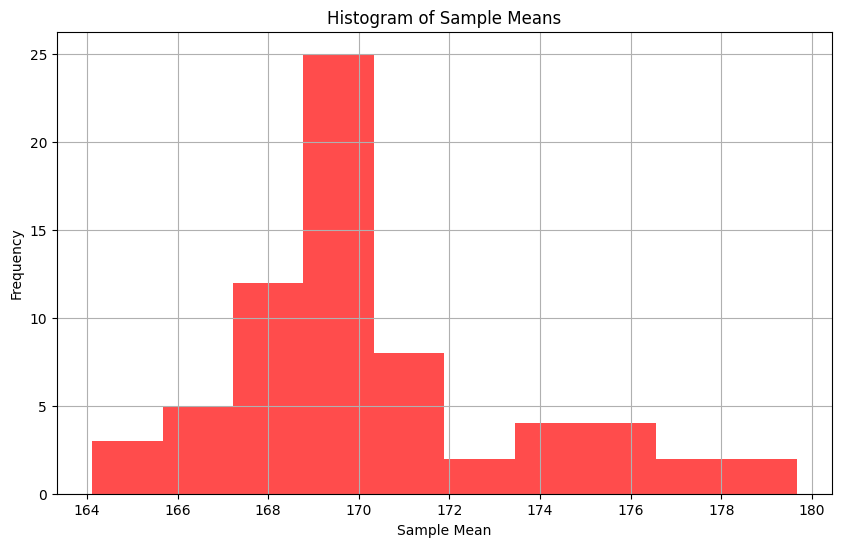

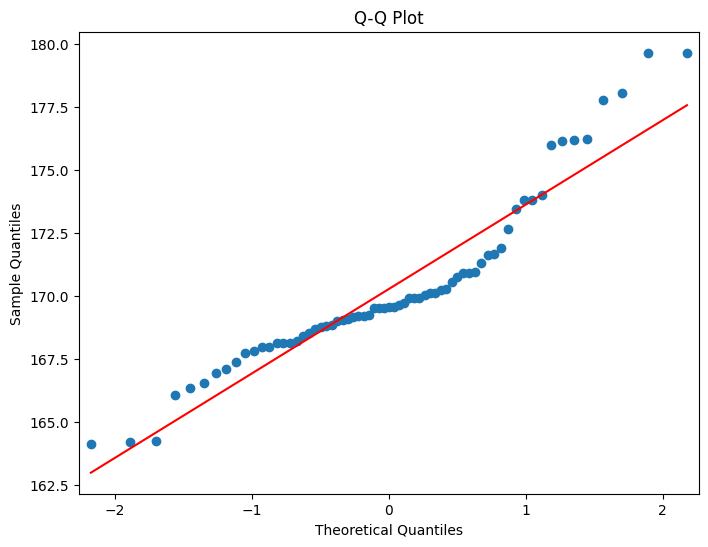

Population mean (𝜇x):170.27939705
Mean of sample means (𝜇 x-bar):170.2826378358209
Population standard deviation (𝜎x):9.46705673863279
Standard deviation of sample mean (𝜎 x-bar):3.3497480728613693
Population standard deviation divided by sqrt(n) (𝜎x/sqrt(n)):1.4968731016062493


In [1396]:
grouped_data = [group['Height'].tolist() for _, group in random.groupby(np.arange(len(df)) // 100)]

sample_means = [np.mean(group) for group in grouped_data]
sample_standard = [np.std(group) for group in grouped_data]
mean = np.array(sample_means)
print(mean)

plt.figure(figsize=(10, 6))
plt.hist(mean, color='red', alpha=0.7)
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
qqplot(mean, line='s', ax=ax)
ax.set_title('Q-Q Plot')
plt.show()

population_mean = sequential["Height"].mean()
mean_of_sample_means = np.mean(mean)
population_sd = sequential["Height"].std()
sd_of_sample_mean = np.std(mean)
sqrtsample = population_sd / sqrt(40)

print(f'Population mean (𝜇x):{population_mean}')
print(f'Mean of sample means (𝜇 x-bar):{mean_of_sample_means}')
print(f'Population standard deviation (𝜎x):{population_sd}')
print(f'Standard deviation of sample mean (𝜎 x-bar):{sd_of_sample_mean}')
print(f'Population standard deviation divided by sqrt(n) (𝜎x/sqrt(n)):{sqrtsample}')

In [1397]:
from scipy.stats import norm

sample_mean = mean_of_sample_means
sample_size = 100

population_std = population_sd

confidence_level = 0.95

z_score = norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * (population_std / (sample_size ** 0.5))

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f'Confidence Interval for n=100: ({lower_bound},{upper_bound})')


Confidence Interval for n=100: (168.42712881108915,172.13814686055267)


## Hypothesis testing n=100


In [1398]:
import numpy as np
from scipy import stats

data = grouped_data[5]

# Hypothesized population mean
mu = 170

sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # Use ddof=1 for sample standard deviation

n = len(data)


z_score = (sample_mean - mu) / (sample_std / np.sqrt(n))
p_value = 2 * stats.norm.cdf(-np.abs(z_score))  # for a two-tailed test


alpha = 0.05

print (f'Z Statistic: {z_score}')
print(f'p value: {p_value}')

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Z Statistic: -0.4191938645176657
p value: 0.6750744557398731
Fail to reject the null hypothesis


## Comparing Different Datasets: Weight and height

Using the Z-statistic for large sample size:

1. 
H0: The means height of male and female are equal. 

Ha: The means height of male and female are not equal.

In [1399]:
from scipy.stats import zscore

male_heights = df[df['Gender'] == 1]['Height']
female_heights = df[df['Gender'] == 0]['Height']

num_rows_to_remove = 136


rows_to_remove = male_heights.sample(n=num_rows_to_remove)


male_heights = male_heights.drop(rows_to_remove.index)


male_mean = male_heights.mean()
female_mean = female_heights.mean()
male_std = male_heights.std()
female_std = female_heights.std()


n_male = len(male_heights)
n_female = len(female_heights)


z_score = (male_mean - female_mean) / sqrt((male_std**2 / n_male) + (female_std**2 / n_female))


p_value = 2 * (1 - norm.cdf(abs(z_score)))

print("Z-score:", z_score)
print("P-value:", p_value)


Z-score: 35.231581395658004
P-value: 0.0


2. 
H0: The mean difference between male and female height is zero.

Ha: The mean difference between male and female height is not zero.

In [1400]:
from scipy.stats import norm

male_mean = male_heights.mean()
female_mean = female_heights.mean()
male_std = male_heights.std()
female_std = female_heights.std()
n_male = len(male_heights)
n_female = len(female_heights)


null_difference = 0

Z = ((male_mean - female_mean) - null_difference) / np.sqrt((male_std**2 / male_std) + (female_std**2 / female_std))

print("Z-score:", Z)

p_value = 2 * (1 - norm.cdf(abs(z_score)))

print("P-value:", p_value)


Z-score: 3.129232343446906
P-value: 0.0


Using the F-statistic for two different variances:

3. 

H0: The standard deviation of male and female height are equal. 

Ha: The standard deviation of male and female height are not equal.

In [1401]:
from scipy.stats import f
male_variance = male_heights.var()
female_variance = female_heights.var()

F_statistic = male_variance / female_variance

df1 = len(male_heights) - 1
df2 = len(female_heights) - 1


critical_value = f.ppf(0.975, df1, df2)  

print("F-statistic:", F_statistic)
print("Critical value:", critical_value)

if F_statistic > critical_value:
    print("Reject the null hypothesis. The standard deviations of male and female heights are not equal.")
else:
    print("Fail to reject the null hypothesis. The standard deviations of male and female heights are equal.")


F-statistic: 0.9361577838418207
Critical value: 1.1371773182072882
Fail to reject the null hypothesis. The standard deviations of male and female heights are equal.


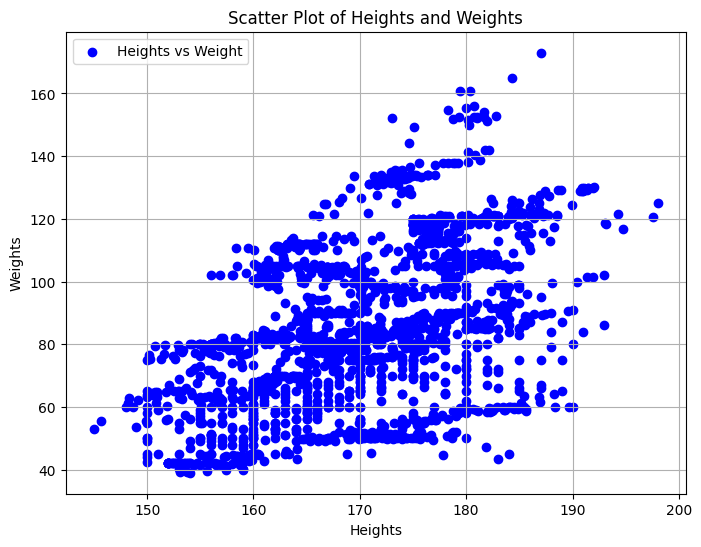

In [1402]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Height'], df['Weight'], color='blue', label='Heights vs Weight')
plt.xlabel('Heights')
plt.ylabel('Weights')
plt.title('Scatter Plot of Heights and Weights')
plt.legend()
plt.grid(True)
plt.show()

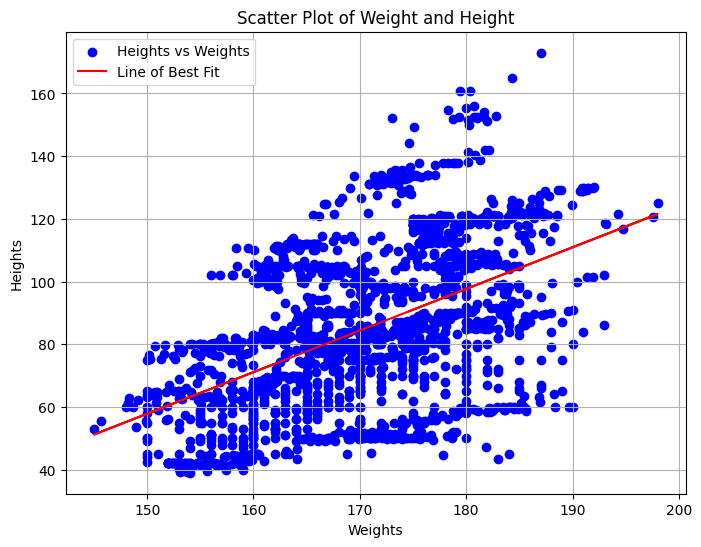

Slope: 1.3275557912740032
Intercept: -141.3135141688734
Correlation Coefficient: 0.4934783372560992


In [1403]:
slope, intercept = np.polyfit(df['Height'], df['Weight'], 1)
correlation_coefficient = np.corrcoef(df['Height'], df['Weight'])[0, 1]


plt.figure(figsize=(8, 6))
plt.scatter(df['Height'], df['Weight'], color='blue', label='Heights vs Weights')
plt.xlabel('Weights')
plt.ylabel('Heights')
plt.title('Scatter Plot of Weight and Height')


plt.plot(df['Height'], slope * df['Height'] + intercept, color='red', label='Line of Best Fit')

plt.legend()
plt.grid(True)
plt.show()

print("Slope:", slope)
print("Intercept:", intercept)
print("Correlation Coefficient:", correlation_coefficient)


In [1404]:

slope, intercept, r_value, p_value, std_err = stats.linregress(df['Height'], df['Weight'])
weight_data = df['Weight']
height_data = df['Height']


residuals = weight_data - (slope * height_data + intercept)
residual_std_error = np.sqrt(np.sum(residuals ** 2) / (len(height_data) - 2))
slope_standard_error = residual_std_error / np.sqrt(np.sum((height_data - np.mean(height_data)) ** 2))


t_statistic = slope / slope_standard_error


p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), len(height_data) - 2))


r_squared = r_value ** 2


alpha = 0.01


if p_value < alpha:
    print("Reject the null hypothesis. The slope of the linear regression model is significantly different from zero.")
else:
    print("Fail to reject the null hypothesis. The slope of the linear regression model is not significantly different from zero.")

print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("Standard Error of the Slope:", slope_standard_error)
print("Coefficient of Determination (R^2):", r_squared)


Reject the null hypothesis. The slope of the linear regression model is significantly different from zero.
T-statistic: 25.36105751488513
P-value: 0.0
Standard Error of the Slope: 0.05234623163859891
Coefficient of Determination (R^2): 0.24352086934104425


In [1405]:
X = sm.add_constant(df['Height'])  
model = sm.OLS(df['Weight'], X).fit()


predicted_weights = model.predict(X)


residuals = predicted_weights - df['Weight']


standard_error_mean = np.std(residuals) / np.sqrt(len(residuals))


mean_predicted_weight = np.mean(predicted_weights)
confidence_interval_mean = mean_predicted_weight + \
    stats.norm.ppf(0.995) * standard_error_mean, mean_predicted_weight - \
    stats.norm.ppf(0.995) * standard_error_mean

standard_deviation_residuals = np.std(residuals)
prediction_interval = mean_predicted_weight + \
    stats.norm.ppf(0.995) * standard_deviation_residuals, mean_predicted_weight - \
    stats.norm.ppf(0.005) * standard_deviation_residuals

print("99% Confidence Interval for Mean Predicted Weight:", confidence_interval_mean)
print("99% Prediction Interval for Individual Predicted Weights:", prediction_interval)


99% Confidence Interval for Mean Predicted Weight: (86.01741830385134, 83.46635273514872)
99% Prediction Interval for Individual Predicted Weights: (141.78544578628254, 141.78544578628254)


Fitting a Multiple Linear Regression Model with Gold and Oil as Predictor Variables, ETF as Response Variable

In [1406]:
import pandas as pd
import statsmodels.api as sm

X = df[['Gender', 'Height','Age','NObeyesdad']]  
y = df['Weight']  

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

coefficients = model.params
intercept = model.params['const']
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj

print("Coefficients:")
print(coefficients)
print("Intercept:", intercept)
print("R^2:", r_squared)
print("Adjusted R^2:", adjusted_r_squared)

Coefficients:
const        -197.403586
Gender         -6.458186
Height          1.510792
Age             0.674997
NObeyesdad      4.019352
dtype: float64
Intercept: -197.4035859774886
R^2: 0.4030643554472395
Adjusted R^2: 0.40186749199951477


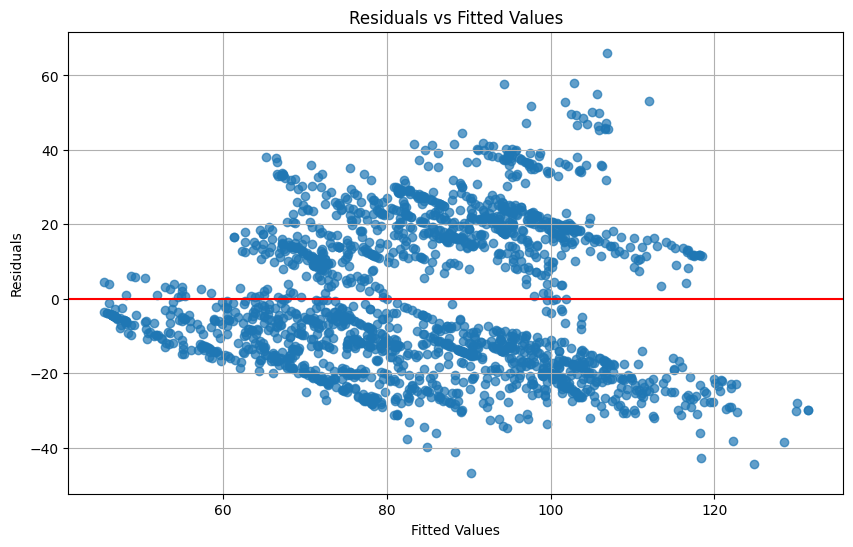

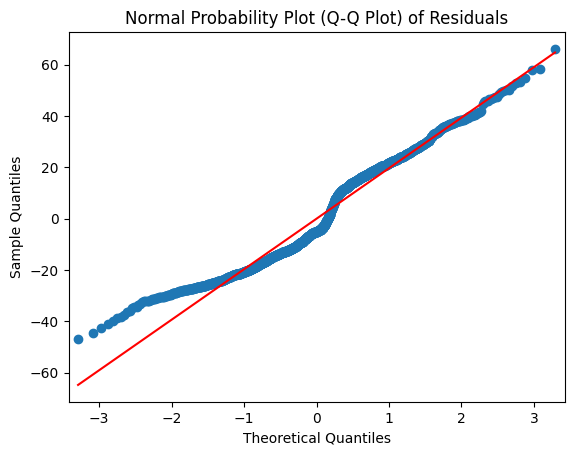

In [1407]:

fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.axhline(y=0, color='red', linestyle='-')
plt.grid(True)
plt.show()

sm.qqplot(residuals, line='s')
plt.title("Normal Probability Plot (Q-Q Plot) of Residuals")
plt.show()


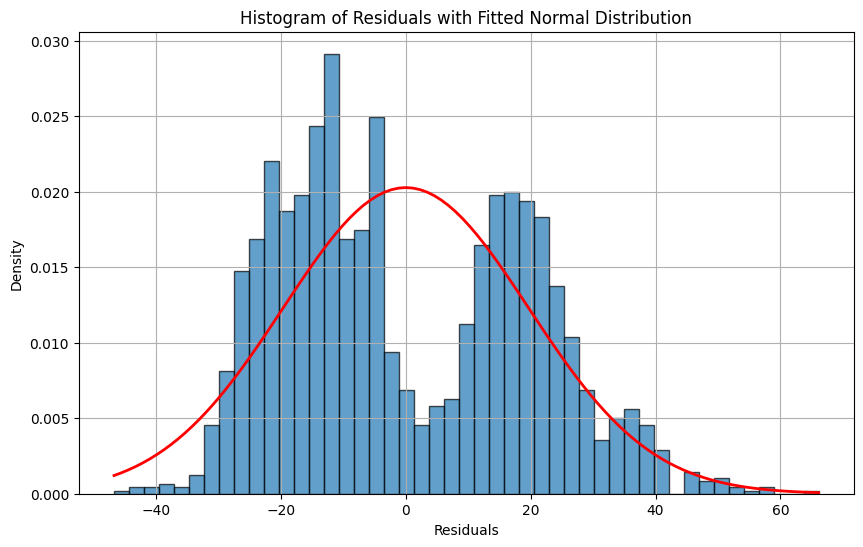

In [1408]:
residuals = model.resid

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=47, edgecolor='black', density=True, alpha=0.7)

residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

x = np.linspace(min(residuals), max(residuals), 100)

plt.plot(x, norm.pdf(x, residual_mean, residual_std), color='red', linestyle='-', linewidth=2)

plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Histogram of Residuals with Fitted Normal Distribution")
plt.grid(True)
plt.show()



In [1409]:
residual_mean

-1.8189894035458565e-14